In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fx_rates = pd.read_csv("FX_ALL.csv", index_col="Datum", parse_dates=True)

In [3]:
equity_price = pd.read_csv("tickers_merged.csv", index_col="Date", parse_dates=True)

In [4]:
fx_rates.head()

1 AUD   1 BGN  1 BRL   1 CAD   1 CHF  1 CNY  1 DKK   1 EUR  \
Datum                                                                     
2016-01-04  17.828  13.814  6.152  17.810  24.796  3.795  3.621  27.020   
2016-01-05  18.038  13.814  6.279  18.042  24.909  3.856  3.622  27.020   
2016-01-06  17.798  13.818  6.233  17.865  24.918  3.845  3.623  27.025   
2016-01-07  17.378  13.820  6.142  17.595  24.857  3.772  3.623  27.030   
2016-01-08  17.438  13.816  6.185  17.632  24.876  3.774  3.622  27.020   

             1 GBP  1 HKD  ...  1 RON  100 RUB  1 SEK   1 SGD  100 THB  1 TRY  \
Datum                      ...                                                  
2016-01-04  36.609  3.199  ...  5.982   33.904  2.946  17.393   68.566  8.399   
2016-01-05  36.892  3.244  ...  5.969   34.262  2.929  17.648   69.597  8.441   
2016-01-06  36.829  3.250  ...  5.976   33.815  2.927  17.565   69.563  8.361   
2016-01-07  36.272  3.208  ...  5.969   33.053  2.913  17.314   68.541  8.238   
2016-01-08  36.246  3.204  ...  5.969   33.609  2.917  17.310   68.597  8.322   

             1 USD   1 XDR  1 ZAR  100 ISK  
Datum                                       
2016-01-04  24.794  34.403  1.593      NaN  
2016-01-05  25.145  34.690  1.612      NaN  
2016-01-06  25.196  34.761  1.591      NaN  
2016-01-07  24.873  34.433  1.545      NaN  
2016-01-08  24.873  34.433  1.554      NaN  

[5 rows x 33 columns]

In [5]:
equity_price.head()

ALAT.PA      CEMA.L      CJPU.L      CSPX.L     IJPE.L   ISJP.L  \
Date                                                                          
2016-06-30  10.7373  107.129997  117.120003  195.354996  35.810001  2451.50   
2016-07-01  10.7373  108.389999  116.410004  197.399994  35.869999  2477.75   
2016-07-04  10.7287  108.330002  117.290001  197.500000  36.095001  2476.75   
2016-07-05  10.5035  106.800003  117.290001  195.869995  35.525002  2521.00   
2016-07-06  10.3885  105.430000  115.389999  195.869995  35.040001  2535.50   

            ISP6.L   MEUD.L  PAF.L  CSEMUS.SW_B  CSINDU.SW_B  EMUL.SW_B  \
Date                                                                      
2016-06-30  3513.0  10208.0  19.00       145.35       186.32      27.63   
2016-07-01  3572.5  10336.0  18.00       147.63       188.37      28.21   
2016-07-04  3562.0  10231.5  20.25       146.06       188.60      27.88   
2016-07-05  3585.0  10227.0  19.75       142.88       187.28      27.49   
2016-07-06  3630.0  10161.0  23.50       140.30       187.00      27.16   

            CECD.LN_B  
Date                   
2016-06-30     16.333  
2016-07-01     16.235  
2016-07-04     16.175  
2016-07-05     15.930  
2016-07-06     15.790

In [6]:
currency_pairs = {"ALAT.PA":"EUR", "CEMA.L":"USD","CJPU.L":"USD", "CSPX.L":"USD","IJPE.L":"EUR","ISJP.L":"GBP","ISP6.L":"GBP","MEUD.L":"GBP","PAF.L":"GBP","CSEMUS.SW_B":"EUR", "CSINDU.SW_B":"USD","EMUL.SW_B":"EUR","CECD.LN_B":"USD"}

In [7]:
for colname in equity_price.columns:
    equity_price[colname+"_diff"] = equity_price[colname].pct_change()

In [8]:
equity_diff = equity_price.iloc[1:,13:].copy()

In [9]:
col_names_new = [n.split("_")[0] for n in equity_diff.columns]

In [10]:
equity_diff.columns = col_names_new

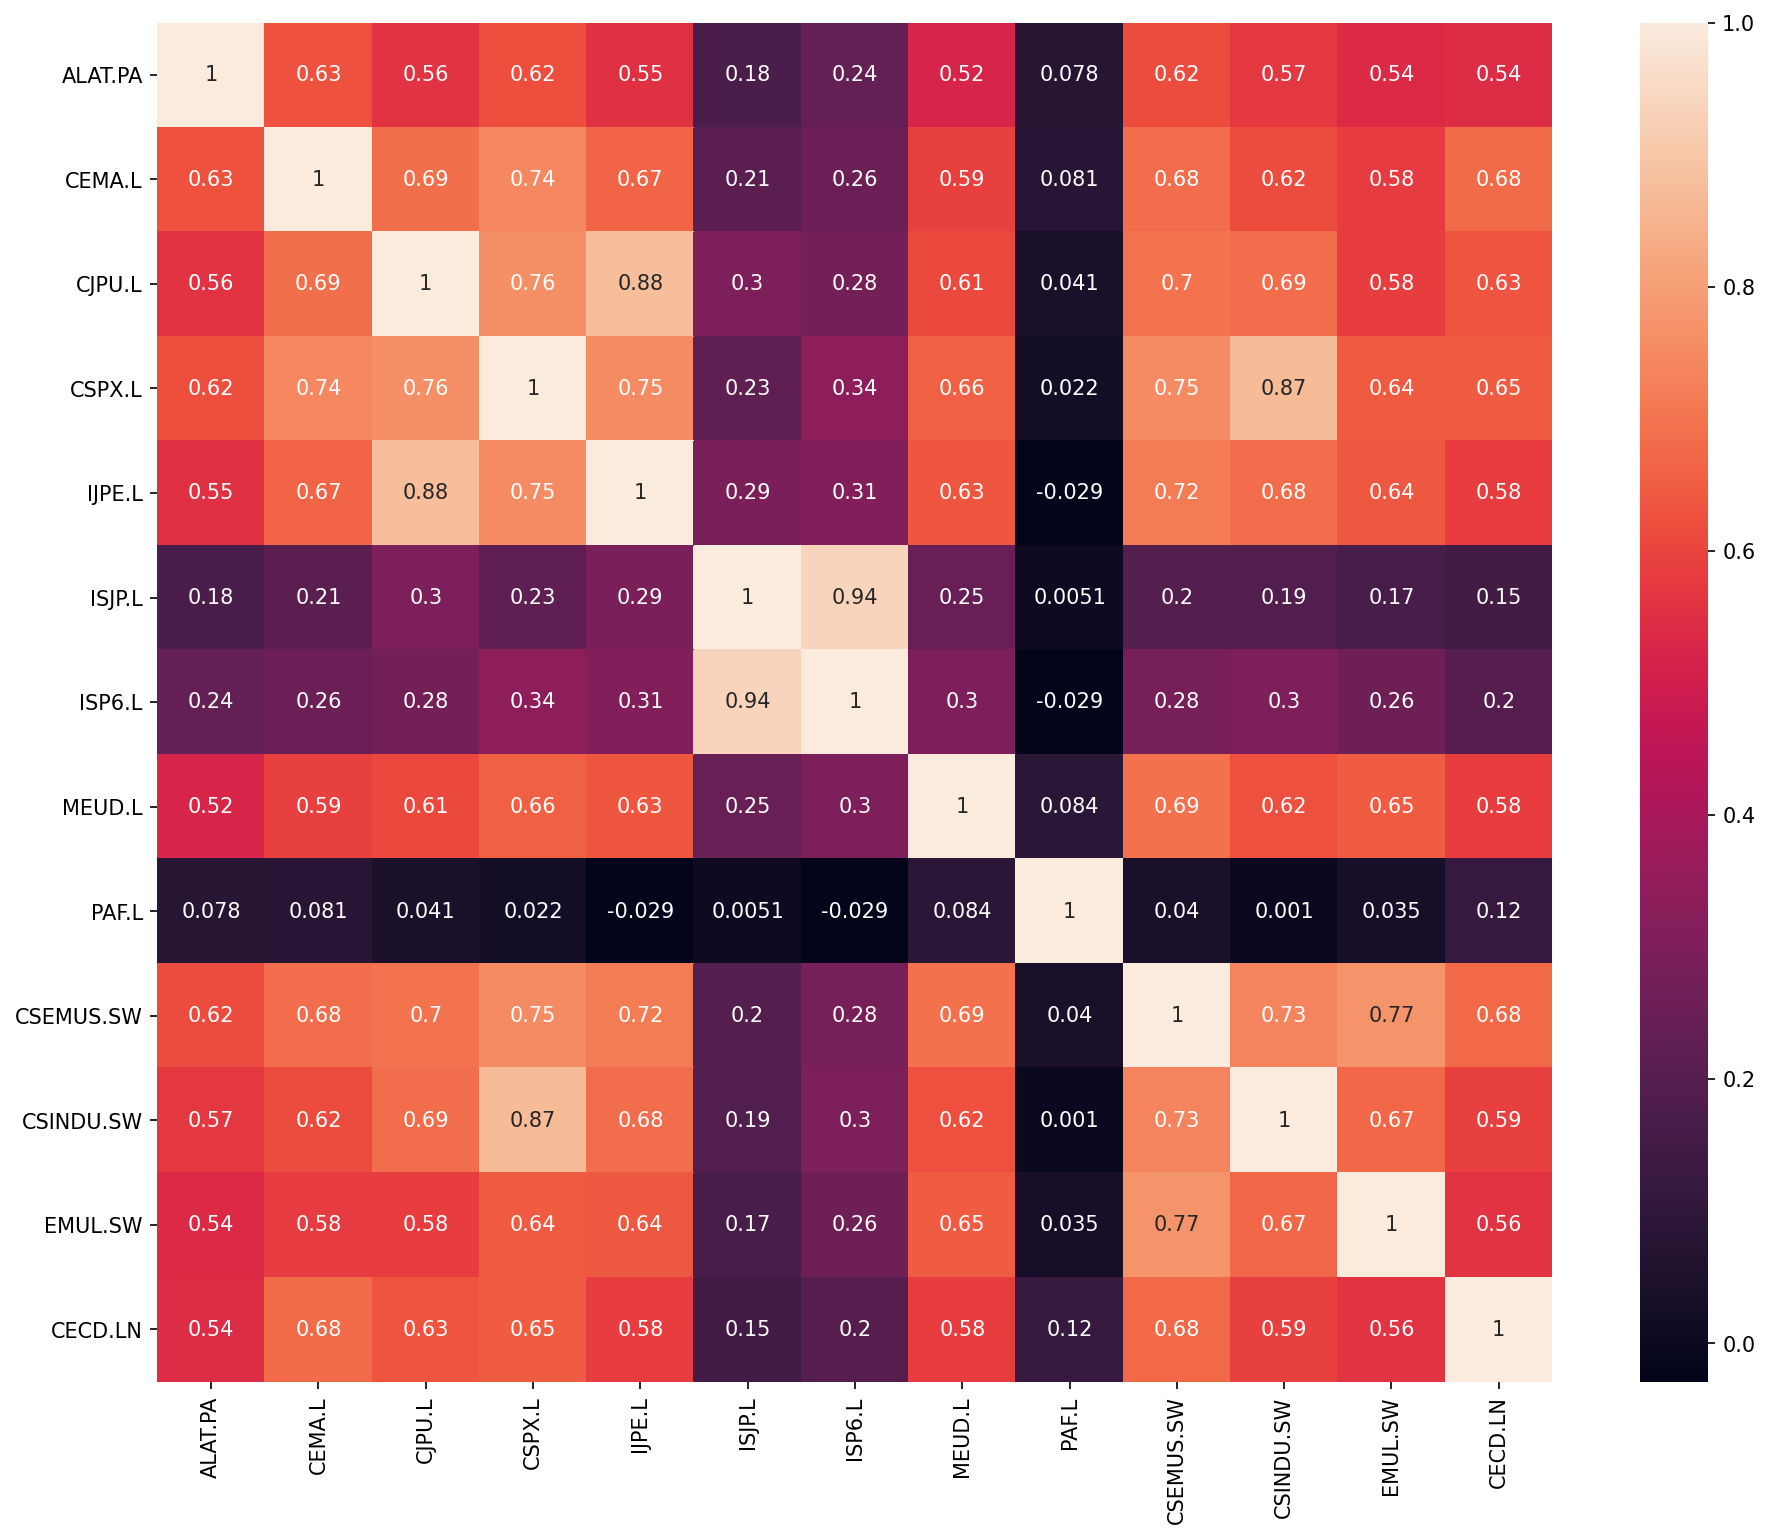

In [13]:
fig,ax = plt.subplots(figsize=(15,12), dpi=150)
fig=sns.heatmap(data=equity_diff.corr(),annot=True)
plt.savefig("heat_equity.png", bbox_inches="tight")

In [12]:
equity_diff.to_csv("equity_diff.csv", header=True)